In [1]:
import cv2
import copy
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('lena.bmp')

### Step1. generate additive white Gaussian noise

In [2]:
def gau_noise(src_img, amp):
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            out[i,j]=src_img[i,j]+amp*np.random.normal(0.0, 1.0, None)
    return out

In [3]:
gau_noise10=gau_noise(img, 10)
gau_noise30=gau_noise(img, 30)

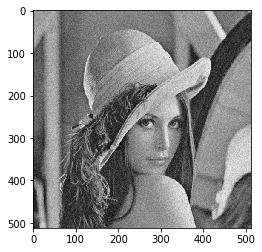

In [4]:
%matplotlib inline
plt.imshow(gau_noise10)

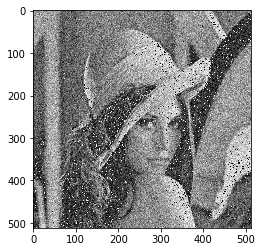

In [5]:
%matplotlib inline
plt.imshow(gau_noise30)

### Step2. generate salt-and-pepper noise

In [6]:
def sp_noise(src_img, threshold):
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            if np.random.uniform(0.0, 1.0, None) < threshold:
                out[i,j]=0
            elif np.random.uniform(0.0, 1.0, None) > 1-threshold:
                out[i,j]=255
            else:
                out[i,j]=src_img[i,j]
    return out

In [7]:
sp_noise005=sp_noise(img, 0.05)
sp_noise01=sp_noise(img, 0.1)

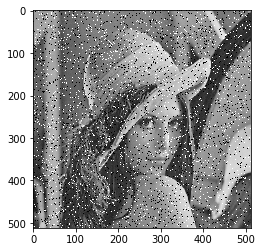

In [8]:
%matplotlib inline
plt.imshow(sp_noise005)

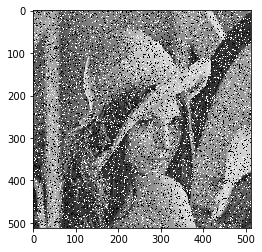

In [9]:
%matplotlib inline
plt.imshow(sp_noise01)

### Step 3. Calculate SNR

In [10]:
def SNR(src_img, noise_img):
    img_sum,mu,n = 0,0,0
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            img_sum+=src_img[i,j,1]
            n+=1
    mu=img_sum/n
    
    vs_sum,vs=0,0
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            vs_sum+=math.pow(src_img[i,j,1]-mu, 2)
    vs=vs_sum/n
    
    noise_diff_sum,noise_mu=0,0
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            noise_diff_sum+=math.fabs(noise_img[i,j,1]-src_img[i,j,1])
    noise_mu=noise_diff_sum/n
    
    vn_sum,vn=0,0
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            vn_sum+=math.pow(noise_img[i,j,1]-src_img[i,j,1]-noise_mu, 2)
    vn=vn_sum/n
    
    snr=0
    snr=20*math.log10(math.pow(vs, 0.5)/math.pow(vn, 0.5))
    return snr

In [41]:
gau_noise10_snr=SNR(img, gau_noise10)
gau_noise30_snr=SNR(img, gau_noise30)
sp_noise005_snr=SNR(img, sp_noise005)
sp_noise01_snr=SNR(img, sp_noise01)
print('gau_noise10_snr: ', gau_noise10_snr, 'gau_noise30_snr: ', gau_noise30_snr, 'sp_noise005_snr: ', sp_noise005_snr, 'sp_noise01_snr: ', sp_noise01_snr)

C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


gau_noise10_snr:  -7.996406235878551 gau_noise30_snr:  -6.8828886775757585 sp_noise005_snr:  1.137753786899918 sp_noise01_snr:  -1.3049468641256812


### Step4. Box filter, 3x3, 5x5

In [12]:
def box_filter(src_img, pos):
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            s=0
            ave=0
            cnt=0
            for k in range(len(pos)):
                if (0<=i+pos[k][0]< src_img.shape[0]) and (0<=j+pos[k][1]< src_img.shape[1]):
                    s+=src_img[i+pos[k][0], j+pos[k][1],1]
                    cnt+=1
            ave=s/cnt
            out[i,j]=ave
    return out  

In [13]:
%time
pos_3=[[0,0],[0,1],[-1,0],[0,-1],[1,0],[1,1],[-1,1],[-1,-1],[1,-1]]
gau_noise10_box3=box_filter(gau_noise10, pos_3)
gau_noise30_box3=box_filter(gau_noise30, pos_3)
sp_noise005_box3=box_filter(sp_noise005, pos_3)
sp_noise01_box3=box_filter(sp_noise01, pos_3)

Wall time: 0 ns


In [42]:
gau_noise10_box3_snr=SNR(img, gau_noise10_box3)
gau_noise30_box3_snr=SNR(img, gau_noise30_box3)
sp_noise005_box3_snr=SNR(img, sp_noise005_box3)
sp_noise01_box3_snr=SNR(img, sp_noise01_box3)
print('gau_noise10_box3_snr: ', gau_noise10_box3_snr, 'gau_noise30_box3_snr: ', gau_noise30_box3_snr, 'sp_noise005_box3_snr: ', sp_noise005_box3_snr, 'sp_noise01_box3_snr: ', sp_noise01_box3_snr)

C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


gau_noise10_box3_snr:  -8.229474063494589 gau_noise30_box3_snr:  -7.788209385707994 sp_noise005_box3_snr:  -7.77684082939232 sp_noise01_box3_snr:  -7.381291962640686


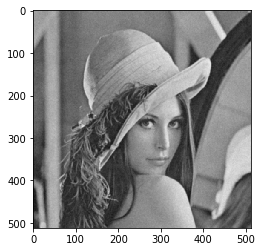

In [15]:
%matplotlib inline
plt.imshow(gau_noise10_box3)

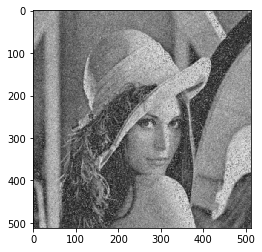

In [16]:
%matplotlib inline
plt.imshow(gau_noise30_box3)

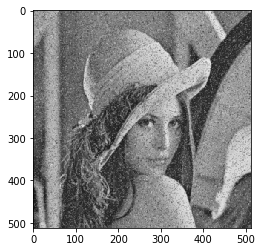

In [17]:
%matplotlib inline
plt.imshow(sp_noise005_box3)

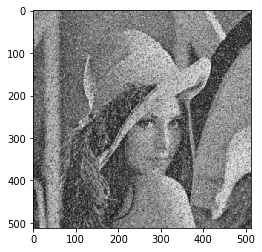

In [18]:
%matplotlib inline
plt.imshow(sp_noise01_box3)

In [19]:
%time
pos_5=[[0,0],[0,1],[-1,0],[0,-1],[1,0],[1,1],[-1,1],[-1,-1],[1,-1],[-2,-2],[-2,-1],[-2,0],[-2,1],[-2,2],[-1,-2],[-1,2],[0,-2],[0,2],[1,-2],[1,2],[2,-2],[2,-1],[2,0],[2,1],[2,2]]
gau_noise10_box5=box_filter(gau_noise10, pos_5)
gau_noise30_box5=box_filter(gau_noise30, pos_5)
sp_noise005_box5=box_filter(sp_noise005, pos_5)
sp_noise01_box5=box_filter(sp_noise01, pos_5)

Wall time: 0 ns


In [43]:
gau_noise10_box5_snr=SNR(img, gau_noise10_box5)
gau_noise30_box5_snr=SNR(img, gau_noise30_box5)
sp_noise005_box5_snr=SNR(img, sp_noise005_box5)
sp_noise01_box5_snr=SNR(img, sp_noise01_box5)
print('gau_noise10_box5_snr: ', gau_noise10_box5_snr, 'gau_noise30_box5_snr: ', gau_noise30_box5_snr, 'sp_noise005_box5_snr: ', sp_noise005_box5_snr, 'sp_noise01_box5_snr: ', sp_noise01_box5_snr)

C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


gau_noise10_box5_snr:  -8.164253278864456 gau_noise30_box5_snr:  -7.8899171783116815 sp_noise005_box5_snr:  -7.883579117033385 sp_noise01_box5_snr:  -7.613445169702702


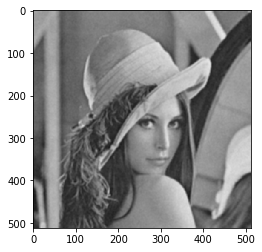

In [21]:
%matplotlib inline
plt.imshow(gau_noise10_box5)

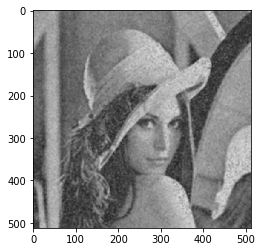

In [22]:
plt.imshow(gau_noise30_box5)

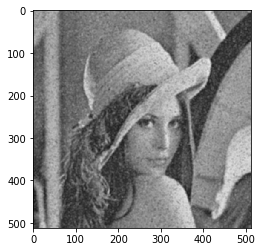

In [23]:
plt.imshow(sp_noise005_box5)

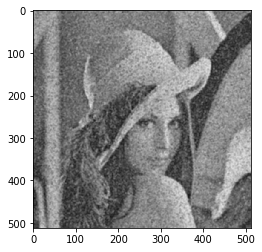

In [24]:
plt.imshow(sp_noise01_box5)

### Step 5. Median filter

In [25]:
def median(src_img, pos):
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            cnt=0
            median_list=[]
            for k in range(len(pos)):
                if (0<=i+pos[k][0]< src_img.shape[0]) and (0<=j+pos[k][1]< src_img.shape[1]):
                    median_list.append(src_img[i+pos[k][0], j+pos[k][1],1])
                    cnt+=1
            median_list.sort()
            out[i,j]=median_list[math.ceil((cnt+1)/2)]
            del median_list[:]
    return out

In [26]:
pos_3=[[0,0],[0,1],[-1,0],[0,-1],[1,0],[1,1],[-1,1],[-1,-1],[1,-1]]
gau_noise10_med3=median(gau_noise10, pos_3)
gau_noise30_med3=median(gau_noise30, pos_3)
sp_noise005_med3=median(sp_noise005, pos_3)
sp_noise01_med3=median(sp_noise01, pos_3)

In [44]:
gau_noise10_med3_snr=SNR(img, gau_noise10_med3)
gau_noise30_med3_snr=SNR(img, gau_noise30_med3)
sp_noise005_med3_snr=SNR(img, sp_noise005_med3)
sp_noise01_med3_snr=SNR(img, sp_noise01_med3)
print('gau_noise10_med3_snr: ', gau_noise10_med3_snr, 'gau_noise30_med3_snr: ', gau_noise30_med3_snr, 'sp_noise005_med3_snr: ', sp_noise005_med3_snr, 'sp_noise01_med3_snr: ', sp_noise01_med3_snr)

C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


gau_noise10_med3_snr:  -7.181199132631901 gau_noise30_med3_snr:  -6.577896957364775 sp_noise005_med3_snr:  -6.46724541682291 sp_noise01_med3_snr:  -6.502636879158922


In [28]:
pos_5=[[0,0],[0,1],[-1,0],[0,-1],[1,0],[1,1],[-1,1],[-1,-1],[1,-1],[-2,-2],[-2,-1],[-2,0],[-2,1],[-2,2],[-1,-2],[-1,2],[0,-2],[0,2],[1,-2],[1,2],[2,-2],[2,-1],[2,0],[2,1],[2,2]]
gau_noise10_med5=median(gau_noise10, pos_5)
gau_noise30_med5=median(gau_noise30, pos_5)
sp_noise005_med5=median(sp_noise005, pos_5)
sp_noise01_med5=median(sp_noise01, pos_5)

In [45]:
gau_noise10_med5_snr=SNR(img, gau_noise10_med5)
gau_noise30_med5_snr=SNR(img, gau_noise30_med5)
sp_noise005_med5_snr=SNR(img, sp_noise005_med5)
sp_noise01_med5_snr=SNR(img, sp_noise01_med5)
print('gau_noise10_med5_snr: ', gau_noise10_med5_snr, 'gau_noise30_med5_snr: ', gau_noise30_med5_snr, 'sp_noise005_med5_snr: ', sp_noise005_med5_snr, 'sp_noise01_med5_snr: ', sp_noise01_med5_snr)

C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


gau_noise10_med5_snr:  -7.974578610662907 gau_noise30_med5_snr:  -7.615916240573614 sp_noise005_med5_snr:  -7.762945075761416 sp_noise01_med5_snr:  -7.778684103555048


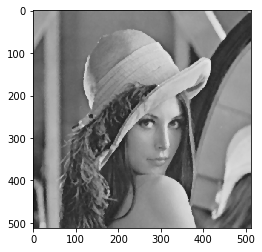

In [30]:
%matplotlib inline
plt.imshow(sp_noise01_med5)

### Step 6. Opening and Closing


In [31]:
def dilation(src_img, pos):
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            local_max=0
            for k in range(len(pos)):
                if (0<=i+pos[k][0]< src_img.shape[0]) and (0<=j+pos[k][1]< src_img.shape[1]) and (src_img[i+pos[k][0], j+pos[k][1],1]>local_max):
                    local_max=src_img[i+pos[k][0], j+pos[k][1],1]
            out[i,j]=local_max
    return out

In [32]:
def erosion(src_img, pos):
    out=copy.copy(src_img)
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            local_min=255
            for k in range(len(pos)):
                if (0<=i+pos[k][0]< src_img.shape[0]) and (0<=j+pos[k][1]< src_img.shape[1]) and (src_img[i+pos[k][0], j+pos[k][1],1]<local_min):
                    local_min=src_img[i+pos[k][0], j+pos[k][1],1]
            out[i,j]=local_min
    return out

In [33]:
def opening(src_img, pos):
    out=copy.copy(src_img)
    out=erosion(src_img,pos)
    out=dilation(out,pos)
    return out

In [34]:
def closing(src_img, pos):
    out=copy.copy(src_img)
    out=dilation(src_img,pos)
    out=erosion(out,pos)
    return out

In [35]:
def open_close(src_img, pos):
    out=copy.copy(src_img)
    out=opening(src_img,pos)
    out=closing(out,pos)
    return out

In [36]:
def close_open(src_img, pos):
    out=copy.copy(src_img)
    out=closing(src_img,pos)
    out=opening(out,pos)
    return out

In [37]:
pos_35535=[[0,0],[0,1],[-1,0],[0,-1],[1,0],[1,1],[-1,1],[-1,-1],[1,-1],[-2,-1],[-2,0],[-2,1],[-1,-2],[-1,2],[0,-2],[0,2],[1,-2],[1,2],[2,-1],[2,0],[2,1]]
gau_noise10_oc=open_close(gau_noise10, pos_35535)
gau_noise30_oc=open_close(gau_noise30, pos_35535)
sp_noise005_oc=open_close(sp_noise005, pos_35535)
sp_noise01_oc=open_close(sp_noise01, pos_35535)

gau_noise10_co=close_open(gau_noise10, pos_35535)
gau_noise30_co=close_open(gau_noise30, pos_35535)
sp_noise005_co=close_open(sp_noise005, pos_35535)
sp_noise01_co=close_open(sp_noise01, pos_35535)

In [46]:
gau_noise10_oc_snr=SNR(img, gau_noise10_oc)
gau_noise30_oc_snr=SNR(img, gau_noise30_oc)
sp_noise005_oc_snr=SNR(img, sp_noise005_oc)
sp_noise01_oc_snr=SNR(img, sp_noise01_oc)
print('gau_noise10_oc_snr: ', gau_noise10_oc_snr, 'gau_noise30_oc_snr: ', gau_noise30_oc_snr, 'sp_noise005_oc_snr: ', sp_noise005_oc_snr, 'sp_noise01_oc_snr: ', sp_noise01_oc_snr)

C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


gau_noise10_oc_snr:  -1.703582836544912 gau_noise30_oc_snr:  4.341375343396324 sp_noise005_oc_snr:  -6.251589106685568 sp_noise01_oc_snr:  -4.7093346983001885


In [47]:
gau_noise10_co_snr=SNR(img, gau_noise10_co)
gau_noise30_co_snr=SNR(img, gau_noise30_co)
sp_noise005_co_snr=SNR(img, sp_noise005_co)
sp_noise01_co_snr=SNR(img, sp_noise01_co)
print('gau_noise10_co_snr: ', gau_noise10_co_snr, 'gau_noise30_co_snr: ', gau_noise30_co_snr, 'sp_noise005_co_snr: ', sp_noise005_co_snr, 'sp_noise01_co_snr: ', sp_noise01_co_snr)

C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Jean\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars


gau_noise10_co_snr:  -1.6351260172040518 gau_noise30_co_snr:  4.445990519778085 sp_noise005_co_snr:  -2.7832596834656065 sp_noise01_co_snr:  -2.9240381961969475


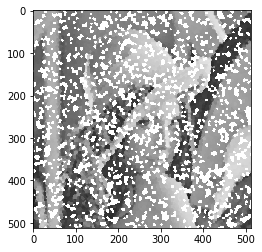

In [39]:
%matplotlib inline
plt.imshow(sp_noise01_co)